Test without beam offset with Au/sapphire at 80K and 300K

{'thickness': 0.005, 'temperature': 80, 'material': <pyFDTR.materials.sapphire object at 0x736a53e99f40>, 'cp': 0.09688563840000002, 'density': 3.97, 'kxx': 6.702924687620913, 'kyy': 6.702924687620913, 'kxy': 0, 'kzz': 6.702924687620913}
{'temperature': 80, 'materialname_1': 'Sapphire', 'materialname_2': 'Au', 'g': 2000.0}
{'thickness': 6e-06, 'temperature': 80, 'material': <pyFDTR.materials.gold object at 0x736a53e32ba0>, 'cp': 1.97792201038336, 'density': 19.3, 'kxx': 0.6839953648000001, 'kyy': 0.6839953648000001, 'kxy': 0, 'kzz': 0.6839953648000001}
{'thickness': 0.005, 'temperature': 300, 'material': <pyFDTR.materials.sapphire object at 0x736a547cf050>, 'cp': 3.0740928999999997, 'density': 3.97, 'kxx': 0.3315190107105972, 'kyy': 0.3315190107105972, 'kxy': 0, 'kzz': 0.3315190107105972}
{'temperature': 300, 'materialname_1': 'Sapphire', 'materialname_2': 'Au', 'g': 5000.0}
{'thickness': 6e-06, 'temperature': 300, 'material': <pyFDTR.materials.gold object at 0x736a54036f00>, 'cp': 2.4

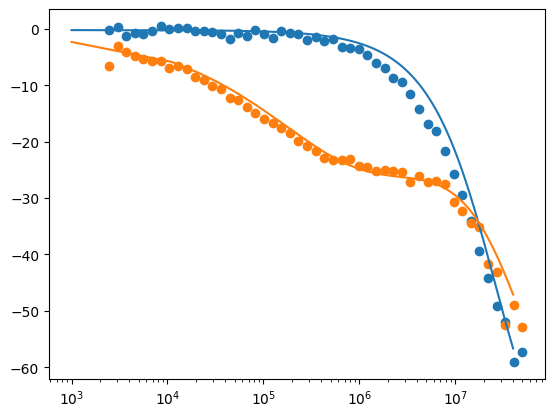

In [2]:
#import required libraries. You might need to install sympy, mpmath, numpy, scypy, matplotlib etc..
#e.g. do it using "conda install sympy" (if using conda) or "pip install sympy"
# 
# 
# 
# Use everthing in cm, like W/cmK. It is necessary to avoid numerical overflow 

import numpy as np
import mpmath
from pyFDTR.domain import *
from pyFDTR.materials import *
from pyFDTR.fouriermodel import *
import matplotlib as mpl
import cProfile
import pstats
import io
import matplotlib.pyplot as plt



load = np.genfromtxt('./sampledata/sapphire-gold60nm_80K.txt',skip_header=2) #load the exprimental files removing the header
points80k = np.delete(load,1,1) #keep only frequency and phase columns

load = np.genfromtxt('./sampledata/sapphire-gold60nm_300K.txt',skip_header=2)
points300k = np.delete(load,1,1)


#frequencies = [1e3,5e3,20e3,50e3,200e3,500e3,1e6,3e6,6e6,10e6,15e6,20e6,40e6] #The frequencies to be calculated in the model
frequencies = np.arange(1e3,40e6,10e3) #create an array of frequencies from the first to the last with the step equal to the difference between the first two

#Here we define the model
domain = Domain(80) #The argument is the temperature: 80K
domain.add_substrate(sapphire) #Add a substrate first it has the thickness = 100um, adiabatic boundary conditions are applied, the argument is a material in the library (materilas.py)
domain.add_layer(60e-7,gold) #Add the following layers first the thickness (in cm remember...) then the material
domain.set_interface_condu(1,2e3) #Set the interface TBC of the interface just created, they a numerated from bottom to top

#It is like this:
#Surface
#Au - 60nm
#Interface 1
#Substrate

#now we create the model
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0,backend='numpy') #first the domain object, then pump radius, the probe radius, and the offset between the pump and the probe, default is 0

#printing thing to check...
print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

#calculate the phase for each frequency
phases_80 = []
for f in frequencies:
  phases_80.append(model.get_phase(f))

#lets repeat it for 300K
domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,5e3)
#if you want to change the material parameters use set_layer_param like below
#domain.set_layer_param(1,kzz=33.6,kxx=33.6)
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0,backend='numpy')
#layers are also numered from bottom to top

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_300 = []
for f in frequencies:
  phases_300.append(model.get_phase(f))

#matlibplot to plot the results
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.semilogx(frequencies, phases_80);  # Plot calculated values
ax.semilogx(frequencies, phases_300);   
ax.scatter(points80k[:,0],points80k[:,1]) #plot the experimental
ax.scatter(points300k[:,0],points300k[:,1])

# def run_model():
#   phases_80 = []
#   domain = Domain(80)
#   domain.add_substrate(sapphire)
#   domain.add_layer(60e-7, gold)
#   domain.set_interface_condu(1, 2e3)
#   model = FourierModelFDTR(domain, 4.05e-4, 4.05e-4, 0)
#   for f in frequencies:
#     phases_80.append(model.get_phase(f))

#   phases_300 = []
#   domain = Domain(300)
#   domain.add_substrate(sapphire)
#   domain.add_layer(60e-7, gold)
#   domain.set_interface_condu(1, 5e3)
#   model = FourierModelFDTR(domain, 4.05e-4, 4.05e-4, 0)
#   for f in frequencies:
#     phases_300.append(model.get_phase(f))

# pr = cProfile.Profile()
# pr.enable()
# run_model()
# pr.disable()
# s = io.StringIO()
# ps = pstats.Stats(pr, stream=s).sort_stats('cumtime')
# ps.print_stats(20)
# print(s.getvalue())

Test beam offset in Au/Sapphire

{'thickness': 0.005, 'temperature': 300, 'material': <pyFDTR.materials.sapphire object at 0x736a53e6e750>, 'cp': 3.0740928999999997, 'density': 3.97, 'kxx': 0.3315190107105972, 'kyy': 0.3315190107105972, 'kxy': 0, 'kzz': 0.3315190107105972}
{'temperature': 300, 'materialname_1': 'Sapphire', 'materialname_2': 'Au', 'g': 5000.0}
{'thickness': 6e-06, 'temperature': 300, 'material': <pyFDTR.materials.gold object at 0x736a517516d0>, 'cp': 2.494334686, 'density': 19.3, 'kxx': 0.660214005, 'kyy': 0.660214005, 'kxy': 0, 'kzz': 0.660214005}
{'thickness': 0.005, 'temperature': 300, 'material': <pyFDTR.materials.sapphire object at 0x736a51ce5700>, 'cp': 3.0740928999999997, 'density': 3.97, 'kxx': 0.3315190107105972, 'kyy': 0.3315190107105972, 'kxy': 0, 'kzz': 0.3315190107105972}
{'temperature': 300, 'materialname_1': 'Sapphire', 'materialname_2': 'Au', 'g': 5000.0}
{'thickness': 6e-06, 'temperature': 300, 'material': <pyFDTR.materials.gold object at 0x736a51af6a20>, 'cp': 2.494334686, 'density': 

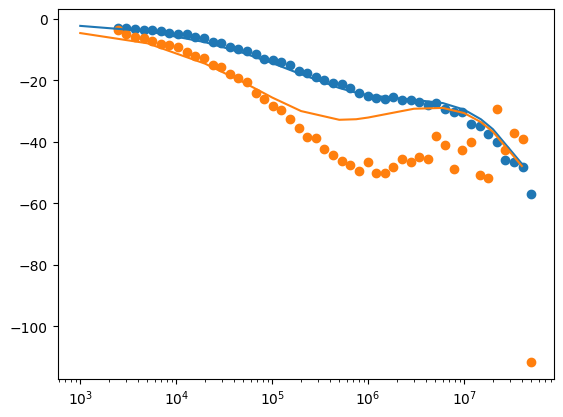

In [3]:
#Just like above with beam offset
#The model does not work so well...

import numpy as np
import mpmath
from pyFDTR.domain import *
from pyFDTR.materials import *
from pyFDTR.fouriermodel import *
import matplotlib as mpl
import matplotlib.pyplot as plt

mpmath.mp.dps = 15

load = np.genfromtxt('./sampledata/subs_00um.txt',skip_header=2)
points00um = np.delete(load,1,1)

load = np.genfromtxt('./sampledata/subs_05um.txt',skip_header=2)
points05um = np.delete(load,1,1)

#frequencies = points00um[:,0]
frequencies = [1e3,5e3,20e3,50e3,100e3,200e3,500e3,750e3,1e6,3e6,6e6,10e6,15e6,20e6,40e6]

domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,5e3)
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0e-4)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_00 = []
for f in frequencies:
  phases_00.append(model.get_phase(f))

domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,5e3)
model = FourierModelFDTR(domain,5e-4,4.5e-4,5e-4)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_10 = []
for f in frequencies:
  phases_10.append(model.get_phase(f))


fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.semilogx(frequencies, phases_00);  # Plot some data on the axes.
ax.semilogx(frequencies, phases_10);  # Plot some data on the axes.
ax.scatter(points00um[:,0],points00um[:,1])
ax.scatter(points05um[:,0],points05um[:,1])

Test the Liquid cell model. Comparison between air, water and IPA

{'thickness': 0.005, 'temperature': 300, 'material': <pyFDTR.materials.Air object at 0x736a53ff3230>, 'cp': 0.000879183, 'density': 0.001225, 'kxx': 0.000259, 'kyy': 0.000259, 'kxy': 0, 'kzz': 0.000259}
{'temperature': 300, 'materialname_1': 'Air', 'materialname_2': 'Au', 'g': 5000.0}
{'thickness': 6e-06, 'temperature': 300, 'material': <pyFDTR.materials.gold object at 0x736a51af72c0>, 'cp': 2.494334686, 'density': 19.3, 'kxx': 0.660214005, 'kyy': 0.660214005, 'kxy': 0, 'kzz': 0.660214005}


/home/marcel/FDTR/pyFDTR/util.py:28: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  real_integral = quad(real_func, a, b, **kwargs)
/home/marcel/FDTR/pyFDTR/util.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  imag_integral = quad(imag_func, a, b, **kwargs)


{'thickness': 0.005, 'temperature': 300, 'material': <pyFDTR.materials.Water object at 0x736a51555a30>, 'cp': 4.18, 'density': 1.0, 'kxx': 0.00598, 'kyy': 0.00598, 'kxy': 0, 'kzz': 0.00598}
{'temperature': 300, 'materialname_1': 'Water', 'materialname_2': 'Au', 'g': 5000.0}
{'thickness': 6e-06, 'temperature': 300, 'material': <pyFDTR.materials.gold object at 0x736a51528980>, 'cp': 2.494334686, 'density': 19.3, 'kxx': 0.660214005, 'kyy': 0.660214005, 'kxy': 0, 'kzz': 0.660214005}


/home/marcel/FDTR/pyFDTR/util.py:28: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  real_integral = quad(real_func, a, b, **kwargs)
/home/marcel/FDTR/pyFDTR/util.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  imag_integral = quad(imag_func, a, b, **kwargs)


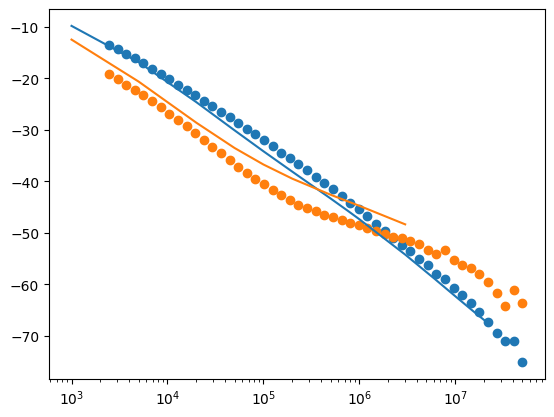

In [4]:
import numpy as np
import mpmath
from pyFDTR.domain import *
from pyFDTR.materials import *
from pyFDTR.fouriermodel import *
import matplotlib as mpl
import matplotlib.pyplot as plt

domain = Domain(300)
domain.add_substrate(Air)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,5e3)

#here we add a layer above the transducer, with is very similar we used before
domain.add_toplayer(50e-4,glass) 
domain.set_top_interface_condu(1,5e3)
#Also numered bottom to top
model = FourierModelFDTR(domain,5e-4,4.5e-4,0e-4)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_10 = []
for f in frequencies:
  phases_10.append(model.get_phase(f)) #Sorry, due to numerical issues we need to use mpmath version, which has more numerical precision to avoid round errors and overflow but is slower

domain = Domain(300)
domain.add_substrate(Water)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,5e3)
domain.add_toplayer(50e-4,glass)
domain.set_top_interface_condu(1,5e3)
model = FourierModelFDTR(domain,5e-4,4.5e-4,0e-4)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_20 = []
for f in frequencies:
  phases_20.append(model.get_phase(f))


load = np.genfromtxt('./sampledata/liquids_air2.txt',skip_header=2)
pointsair= np.delete(load,1,1)

load = np.genfromtxt('./sampledata/liquids_water.txt',skip_header=2)
pointsIPA = np.delete(load,1,1)

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.semilogx(frequencies, phases_10);  # Plot some data on the axes.
ax.semilogx(frequencies, phases_20);  # Plot some data on the axes.
ax.scatter(pointsair[:,0],pointsair[:,1])
ax.scatter(pointsIPA[:,0],pointsIPA [:,1])




How to fit parameters

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 44
    # data points      = 47
    # variables        = 1
    chi-square         = 143.300069
    reduced chi-square = 3.11521890
    Akaike info crit   = 54.3952812
    Bayesian info crit = 56.2454288
[[Variables]]
    kz:  0.28117428 +/- 0.01800587 (6.40%) (init = 0.4)


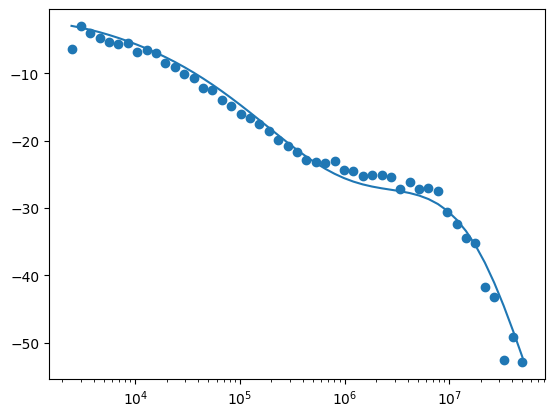

In [1]:
import numpy as np
import mpmath
from pyFDTR.domain import *
from pyFDTR.materials import *
from pyFDTR.fouriermodel import *
import matplotlib as mpl
import matplotlib.pyplot as plt

#We use lmfit library, do not forget to install it too
import lmfit

#define a list of parameters object
var_par = Fitting_parameters()
#add parameters in the fit (name, starting value, min and max)
var_par.add('kz', value=0.40, min=0.10, max=0.70)
var_par.add('thick', value=60e-7, min=40e-7, max=80e-7)


load = np.genfromtxt('./sampledata/sapphire-gold60nm_300K.txt',skip_header=2)
points300k = np.delete(load,1,1)


domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,5e3)
domain.set_layer_param(0,kzz=var_par.get_parameter('kz'))
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0,fitting_params=var_par, backend='numpy',jit=True)

out = model.minimize(points300k,method='nelder')
#different methods not tested yet, find yourself the best one
lmfit.report_fit(out)

phases_300 = []
for f in points300k[:,0]:
  phases_300.append(model.get_phase(f))

#matlibplot to plot the results
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.semilogx(points300k[:,0], phases_300);   
ax.scatter(points300k[:,0],points300k[:,1])

In [4]:
#Using jupyter you can always check the variables values
points300k[25,0]

431152.41

Sensitivity

{'thickness': 0.005, 'temperature': 300, 'material': <pyFDTR.materials.sapphire object at 0x736a541a5940>, 'cp': 3.0740928999999997, 'density': 3.97, 'kxx': 0.3315190107105972, 'kyy': 0.3315190107105972, 'kxy': 0, 'kzz': 0.3315190107105972}
{'temperature': 300, 'materialname_1': 'Sapphire', 'materialname_2': 'Au', 'g': 5000.0}
{'thickness': 6e-06, 'temperature': 300, 'material': <pyFDTR.materials.gold object at 0x736a5465e3c0>, 'cp': 2.494334686, 'density': 19.3, 'kxx': 0.660214005, 'kyy': 0.660214005, 'kxy': 0, 'kzz': 0.660214005}
{'thickness': 0.005, 'temperature': 300, 'material': <pyFDTR.materials.sapphire object at 0x736a4eebb2c0>, 'cp': 3.0740928999999997, 'density': 3.97, 'kxx': 0.3315190107105972, 'kyy': 0.3315190107105972, 'kxy': 0, 'kzz': 0.3315190107105972}
{'temperature': 300, 'materialname_1': 'Sapphire', 'materialname_2': 'Au', 'g': 5000.0}
{'thickness': 6.6e-06, 'temperature': 300, 'material': <pyFDTR.materials.gold object at 0x736a5171cef0>, 'cp': 2.494334686, 'density'

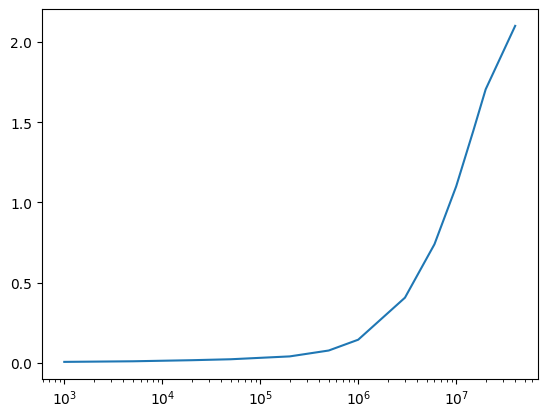

In [6]:
import numpy as np
import mpmath
from pyFDTR.domain import *
from pyFDTR.materials import *
from pyFDTR.fouriermodel import *
import matplotlib as mpl
import matplotlib.pyplot as plt


mpmath.mp.dps = 5

load = np.genfromtxt('./sampledata/sapphire-gold60nm_80K.txt',skip_header=2)
points80k = np.delete(load,1,1)

load = np.genfromtxt('./sampledata/sapphire-gold60nm_300K.txt',skip_header=2)
points300k = np.delete(load,1,1)

frequencies = [1e3,5e3,20e3,50e3,200e3,500e3,1e6,3e6,6e6,10e6,15e6,20e6,40e6]

domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,5e3)
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_80 = []
for f in frequencies:
  phases_80.append(model.get_phase(f))

domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(66e-7,gold)
domain.set_interface_condu(1,5e3)
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_300 = []
for f in frequencies:
  phases_300.append(model.get_phase(f))

#Sensitivity is just the difference change that parameter
difference = np.array(phases_80)-np.array(phases_300) #converting to nparray just to do the math quickly

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.semilogx(frequencies, difference);  # Plot some data on the axes.


Example of 2 models sharing a parameter

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 74
    # data points      = 96
    # variables        = 3
    chi-square         = 400.240646
    reduced chi-square = 4.30366286
    Akaike info crit   = 143.060908
    Bayesian info crit = 150.753952
##  Warning: uncertainties could not be estimated:
[[Variables]]
    kz:     0.09721079 (init = 0.1)
    itf_1:  4007.65007 (init = 5000)
    itf_2:  8681.06628 (init = 5000)


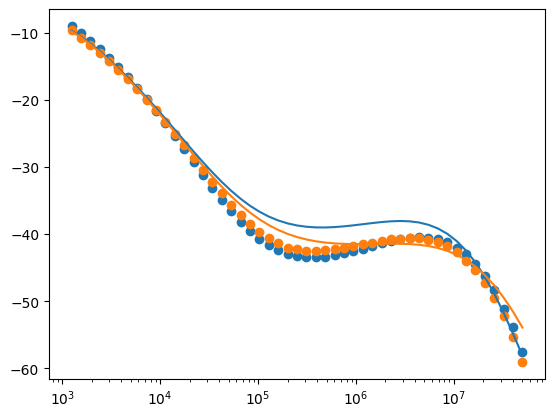

In [1]:
import numpy as np
import mpmath
from pyFDTR.domain import *
from pyFDTR.materials import *
from pyFDTR.fouriermodel import *
import matplotlib as mpl
import matplotlib.pyplot as plt

#We use lmfit library, do not forget to install it too
import lmfit

#define a list of parameters object
var_par = Fitting_parameters()
#add parameters in the fit (name, starting value, min and max)
var_par.add('kz', value=0.10, min=0.03, max=0.40)
var_par.add('itf_1', value=5e3, min=5e2, max=5e5)
var_par.add('itf_2', value=5e3, min=5e2, max=5e5)

load = np.genfromtxt('./sampledata/STO1.txt',skip_header=2)
points1 = np.delete(load,1,1)
load = np.genfromtxt('./sampledata/STO2.txt',skip_header=2)
points2 = np.delete(load,1,1)


domain1 = Domain(300)
domain1.add_substrate(STO)
domain1.add_layer(60e-7,gold)
domain1.set_interface_condu(1,var_par.get_parameter('itf_1'))
domain1.set_layer_param(0,kzz=var_par.get_parameter('kz'),kxx=var_par.get_parameter('kz'),kyy=var_par.get_parameter('kz'))
model1 = FourierModelFDTR(domain1,10.4e-4,10.4e-4,0,fitting_params=var_par, backend='numpy',jit=True)

domain2 = Domain(300)
domain2.add_substrate(STO)
domain2.add_layer(60e-7,gold)
domain2.set_interface_condu(1,var_par.get_parameter('itf_2'))
domain2.set_layer_param(0,kzz=var_par.get_parameter('kz'),kxx=var_par.get_parameter('kz'),kyy=var_par.get_parameter('kz'))
model2 = FourierModelFDTR(domain2,10.4e-4,10.4e-4,0,fitting_params=var_par, backend='numpy',jit=True)


out = multimodel_fitting([model1,model2],[points1,points2],method='nelder',max_nfev=1000)
#different methods not tested yet, find yourself the best one
lmfit.report_fit(out)

phases_1 = []
for f in points1[:,0]:
  phases_1.append(model1.get_phase(f))
phases_2 = []
for f in points2[:,0]:
  phases_2.append(model2.get_phase(f))

#matlibplot to plot the results
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.semilogx(points1[:,0], phases_1);   
ax.scatter(points1[:,0],points1[:,1])
ax.semilogx(points2[:,0], phases_2);   
ax.scatter(points2[:,0],points2[:,1])